# Telecom Churn - Group Case Study

###### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one,
customer retention has now become even more important than customer acquisition.

###### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn

For this project, you will use the **usage-based** definition to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 


###### business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**Filename:** telecom_churn_data.csv

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To read file in google collab
#from google.colab import files
#uploaded = files.upload()

In [2]:
import io
#telecom = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))
telecom = pd.read_csv('telecom_churn_data.csv')

In [4]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
#Total customers
print("Unique customers/MSISDN in the data: %d"%len(telecom.mobile_number.unique()))

Unique customers/MSISDN in the data: 99999


In [19]:
#list of columns/features
telecom.select_dtypes(exclude = ['float64','int64'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
5,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/19/2014,7/17/2014,8/24/2014,9/28/2014,NaN,NaN,NaN,NaN
6,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/28/2014,9/28/2014,NaN,NaN,NaN,NaN
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
9,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/23/2014,8/29/2014,9/20/2014,NaN,7/23/2014,NaN,NaN


##  Data Cleaning


In [8]:
#Missing value percentage in the features
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
total_missing.sort_values(ascending= False)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
          

In [9]:
#Features having more than 50% missing values
len(total_missing.loc[total_missing > 50])

40

In [10]:
#Name of the 40 columns which have more than 50% missing values
total_missing.sort_values(ascending= False).head(40)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

We can see that some of these features are important for analysis purpose and we can't ignore them. So we need to analyse them and should impute the missing values.
It seems that these features don't have any values for the coustomers and can be imputed with 0.


In [11]:
dropCol = ['fb_user','night_pck_user']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in dropCol]:
   telecom.drop([col],axis =1 ,inplace=True)

In [12]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeCol]:
  telecom[col].fillna(0, inplace=True)

In [13]:
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
len(total_missing.loc[total_missing > 50])

4

Now we have 4 features which have more than 50% missing values.
We can drop them as they are not much important for analysis purpose


In [14]:
total_missing.sort_values(ascending=False).head(4)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_9    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_7    74.0
dtype: float64

In [15]:
#date_of_last_rech_data_6 , date_of_last_rech_data_7, date_of_last_rech_data_8, date_of_last_rech_data_9
missingcol = [ 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom.drop(missingcol, axis = 1,inplace= True)
telecom.shape

(99999, 214)

In [16]:
#Missing values more than 5%
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
len(total_missing.loc[total_missing > 5])

29

we have 29 features having more than 5% missing values
Let's take a look the features name 

In [17]:
total_missing.sort_values(ascending=False).head(29)

loc_og_t2f_mou_9    8.0
std_ic_t2t_mou_9    8.0
offnet_mou_9        8.0
loc_ic_mou_9        8.0
roam_ic_mou_9       8.0
std_og_t2m_mou_9    8.0
roam_og_mou_9       8.0
std_ic_t2o_mou_9    8.0
loc_og_t2t_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2t_mou_9    8.0
spl_og_mou_9        8.0
loc_og_t2m_mou_9    8.0
loc_og_mou_9        8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_mou_9        8.0
loc_og_t2c_mou_9    8.0
onnet_mou_9         8.0
isd_og_mou_9        8.0
isd_ic_mou_9        8.0
spl_ic_mou_9        8.0
ic_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
std_og_mou_9        8.0
std_og_t2c_mou_9    8.0
og_others_9         8.0
loc_ic_t2f_mou_9    8.0
dtype: float64

As we can see that all these features belong to the '_9' which represents the customers 9th month data.
We need to check if this data is missing for the same customers throughout the columns


In [18]:
missingcol =['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol]

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like for 7745 Customers all these features are empty together without any value. We can choose to impute these values with 0 also.

In [20]:
for col in [y for y in missingcol]:
    telecom[col].fillna(0, inplace=True)

In [21]:
telecom=telecom[~telecom[missingcol].isnull().all(axis=1)]
telecom.shape

(99999, 214)

In [22]:
#Missing values more than 2%
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
len(total_missing.loc[total_missing > 2])

89

Now we have 89 features having more than 2% missing values

In [23]:
total_missing.sort_values(ascending=False).head(89)

og_others_8            5.0
std_ic_t2o_mou_8       5.0
isd_og_mou_8           5.0
loc_og_t2f_mou_8       5.0
ic_others_8            5.0
std_ic_t2f_mou_8       5.0
roam_ic_mou_8          5.0
loc_og_mou_8           5.0
roam_og_mou_8          5.0
std_og_t2t_mou_8       5.0
std_ic_mou_8           5.0
isd_ic_mou_8           5.0
loc_og_t2t_mou_8       5.0
loc_og_t2c_mou_8       5.0
spl_og_mou_8           5.0
loc_og_t2m_mou_8       5.0
std_ic_t2m_mou_8       5.0
offnet_mou_8           5.0
onnet_mou_8            5.0
std_ic_t2t_mou_8       5.0
date_of_last_rech_9    5.0
loc_ic_t2m_mou_8       5.0
loc_ic_t2t_mou_8       5.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_8       5.0
loc_ic_t2f_mou_8       5.0
spl_ic_mou_8           5.0
std_og_t2m_mou_8       5.0
loc_ic_mou_8           5.0
std_og_mou_8           5.0
                      ... 
std_og_t2c_mou_6       4.0
og_others_7            4.0
og_others_6            4.0
std_og_t2c_mou_7       4.0
date_of_last_rech_8    4.0
loc_og_t2t_mou_6       4.0
r

all these features have 5 or 4% missing values. Let's check if these have some common rows or not

In [24]:
missingcol = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'date_of_last_rech_8', 'date_of_last_rech_9']
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like there are 381 Customers for whom all these features are without any value. Let's drop these customers from the data.

In [26]:
telecom=telecom[~telecom[missingcol].isnull().all(axis=1)]
telecom.shape

(99618, 214)

In [27]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
for col in [y for y in missingcol]:
    telecom[col].fillna(0, inplace=True)

In [28]:
#Missing values
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
len(total_missing.loc[total_missing > 0])

9

we have 9 features which still have missing values

In [29]:
total_missing.sort_values(ascending=False).head(9)

date_of_last_rech_9     4.0
date_of_last_rech_8     3.0
loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_7     1.0
date_of_last_rech_6     1.0
dtype: float64

In [30]:
#Let's the values in these columns
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,telecom[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [31]:
#Some of these features take only one value. So we can  impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(telecom[c].value_counts())
    telecom[c].fillna(telecom[c].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [32]:
#Missing values
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
len(total_missing.loc[total_missing > 0])

4

In [33]:
total_missing.sort_values(ascending=False).head(4)

date_of_last_rech_9    4.0
date_of_last_rech_8    3.0
date_of_last_rech_7    1.0
date_of_last_rech_6    1.0
dtype: float64

we have the missing values in the features which shows the last recharge date
we can impute it with the last date of that month

In [34]:
telecom['date_of_last_rech_6'].fillna('6/30/2014', inplace = True)
telecom['date_of_last_rech_7'].fillna('7/31/2014', inplace = True)
telecom['date_of_last_rech_8'].fillna('8/31/2014', inplace = True)
telecom['date_of_last_rech_9'].fillna('9/30/2014', inplace = True)

In [35]:
#Missing values
total_missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
len(total_missing.loc[total_missing > 0])

0

In [36]:
#Let's look for columns having all values as 0

columns_as_zero=telecom.columns[(telecom == 0).all()]
columns_as_zero

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [37]:
# As the above columns have all values as 0, we can drop these columns

telecom.drop(columns_as_zero,axis=1,inplace=True)

### Let's calculate the percentage of data left after treating the missing values.

In [38]:
print("Percentage of data remaining after treating missing values: {}%".format(round(telecom.shape[0]/99999 *100,2)))
print ("Number of users: {}".format(telecom.shape[0]))
print ("Number of features: {}".format(telecom.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of users: 99618
Number of features: 203


In [39]:
#Let's look at the datatypes of the columns

telecom.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(telecom.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [40]:
# Let's converting datatype of date columns to datetime
for col in date_columns:
    telecom[col] = pd.to_datetime(telecom[col], format='%m/%d/%Y')

In [41]:
telecom['last_date_of_month_6'].unique()

array(['2014-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

### We don't need the last date of months. We can remove these columns

In [42]:
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9',], axis =1, inplace = True)

In [43]:
#Checking the datatypes (datetime/float/int)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 199 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(160), int64(35)
memory usage: 151.2 MB


In [44]:
telecom.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=199)

#### There are some monthly variables which are not in the standard naming (_6,_7,_8,_9)

Lets fix them for data consistency


In [45]:
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [46]:
#We don't need the complete date, so we can replace it witht the Day only
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom.date_of_last_rech_6).dt.day
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom.date_of_last_rech_7).dt.day
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom.date_of_last_rech_8).dt.day

## Let's Filter high-value customers

As mentioned, we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [47]:
rechcol = telecom.filter(regex=('count')).columns
telecom[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Let's create derived colums

The Derived Column helps to showcase the data with better representation and also helps working on Model building.

In [48]:
#'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9' :- 
#For these we can use the 2G + 3G data combined

for i in range(6,10):
    telecom['vol_data_mb_'+str(i)] = (telecom['vol_2g_mb_'+str(i)]+telecom['vol_3g_mb_'+str(i)]).astype(int)

In [49]:
dropCol = ['vol_2g_mb','vol_3g_mb']
for col in [y + s for s in ['_6','_7','_8',] for y in dropCol]:
   telecom.drop([col],axis =1 ,inplace=True)

In [50]:
#avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

#These will store the average recharge value for each customer for every month
for i in range(6,10):
    telecom['avg_rech_amt_'+str(i)] = round(telecom['total_rech_amt_'+str(i)]/telecom['total_rech_num_'+str(i)]+1,2)

In [51]:
#total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

#These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month

for i in range(6,10):
    telecom['total_rech_num_data_'+str(i)] = (telecom['count_rech_2g_'+str(i)]+telecom['count_rech_3g_'+str(i)]).astype(int)

In [52]:
dropCol = ['count_rech_2g','count_rech_3g']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in dropCol]:
   telecom.drop([col],axis =1 ,inplace=True)

In [53]:
#total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

#These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

for i in range(6,10):
    telecom['total_rech_amt_data_'+str(i)] = telecom['total_rech_num_data_'+str(i)]*telecom['av_rech_amt_data_'+str(i)]

In [54]:
#total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

#These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

for i in range(6,10):
    telecom['total_month_rech_'+str(i)] = telecom['total_rech_amt_'+str(i)]+telecom['total_rech_amt_data_'+str(i)]
telecom.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [55]:
# Let's check the mean of first two months (good phase) total monthly recharge amount
goodPhase_mean =(telecom.total_month_rech_6 + telecom.total_month_rech_7)/2
# looking the cutoff which is the 70th percentile of the good phase mean recharge amounts
highv_cutoff= np.percentile(goodPhase_mean,70)

In [56]:
# Let's filter the users whose good phase mean recharge amount >= to the cutoff of 70th percentile.
highv_users = telecom[goodPhase_mean >=  highv_cutoff]
highv_users.reset_index(inplace=True,drop=True)

print("No. of High-Value users: %d\n" % len(highv_users))
print("% of High-value users : {}%".format(round(len(highv_users)/telecom.shape[0]*100),2))

No. of High-Value users: 29906

% of High-value users : 30%


##### Tagging the Churners
Now let's tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [57]:
churnPhaseMonth=9
churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
flag = ~highv_users[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
flag = flag.map({True:1, False:0})

In [58]:
highv_users['churn'] = flag
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(highv_users[highv_users.churn == 1]),highv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(highv_users[highv_users.churn == 1])/highv_users.shape[0] *100,2)))


There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


- From the above values we can see that there are just **8.09% churn** cases.
- This clearly indicates that the dataset is **highly imbalanced** where the churn cases are the minority(8.14%) as opposed to the non-churners who are the majority(91.91)

In [59]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
colwith_9List = highv_users.filter(regex=('_9')).columns
highv_users.drop(colwith_9List,axis=1,inplace=True)

#### Outlier Treatment


In [60]:
highv_users.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,2.990600e+04,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,7.001206e+09,109.0,558.806269,561.616785,509.247607,261.171296,268.288923,234.500335,374.178469,378.617878,...,1.671404,1.857453,1.624189,456.901584,529.614264,464.170286,1118.175676,1191.074473,1049.299491,0.080853
std,6.907405e+05,0.0,460.374956,480.202624,502.346776,460.136333,480.586917,458.952539,482.957035,499.398782,...,2.834520,3.095381,2.999321,1420.718202,1478.150374,1625.036120,1568.077084,1634.175261,1806.779214,0.272614
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000026e+09,109.0,1.098500,1.324000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000251e+09,109.0,171.863500,178.390500,84.817000,0.730000,0.585000,0.000000,11.385000,10.635000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,376.000000,383.000000,103.500000,0.000000
25%,7.000609e+09,109.0,310.568500,310.641000,231.802000,17.160000,16.045000,10.510000,71.730000,70.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,547.000000,552.000000,396.000000,0.000000
50%,7.001203e+09,109.0,482.619000,481.813000,427.616000,84.780000,82.890000,65.730000,222.860000,220.300000,...,1.000000,1.000000,1.000000,92.000000,101.000000,25.000000,789.000000,815.000000,690.000000,0.000000
75%,7.001803e+09,109.0,700.290750,699.132750,662.286750,290.895000,290.755000,240.710000,488.307500,494.437500,...,2.000000,2.000000,2.000000,400.000000,575.000000,308.000000,1210.000000,1271.000000,1154.000000,0.000000
90%,7.002165e+09,109.0,994.248000,996.535000,978.198000,755.860000,785.320000,666.740000,897.260000,917.595000,...,5.000000,5.000000,5.000000,1128.000000,1374.000000,1088.000000,2015.000000,2182.000000,2040.000000,0.000000


 - As we can see we have outlier
  We can keep data between 0.01 and 0.99 percentiles

In [61]:
cont_cols = [col for col in highv_users.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = highv_users[col].quantile([0.01,0.99]).values
    highv_users[col][telecom[col] <= percentiles[0]] = percentiles[0]
    highv_users[col][telecom[col] >= percentiles[1]] = percentiles[1]

In [62]:
highv_users.shape

(29906, 154)

### Correlation Analysis

 - To handle the multicolineraity PCA for feature selection in our first model.
 - For the second model we will use PCA with Random Forest overcome the multicoliniarity.

### Derived features
#### From correlation heatmap it's clear that there is no single feature which explain variation of traget variable. So we need to derive some features which can explain the target variable.

 - From the data it's clear that internet usage redused when consumer is about the churn. We can use median of internet usage.
 - It was observed larger the tenure, lesser was the churn, so we can create bucket from this feature.

In [63]:
highv_users['int_usage_median'] = highv_users[['vol_data_mb_6','vol_data_mb_7','vol_data_mb_8']].median(axis=1)
highv_users['int_usage_median'] = highv_users.int_usage_median.map(lambda x: 1 if x == 0 else 0)

highv_users['tenure_buck'] = np.round(highv_users['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
highv_users['tenure_buck'] = pd.cut(highv_users['tenure_buck'], bins)
highv_users['tenure_buck'].value_counts()

(4, 10]    9115
(1, 2]     7595
(0, 1]     5927
(2, 3]     4381
(3, 4]     2825
Name: tenure_buck, dtype: int64

In [64]:
#We have some features which have almost zero variance. Let's remove them.
highv_users = highv_users.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon',
                                'circle_id',], 1)

In [65]:
highv_users.shape

(29906, 149)

In [66]:
total_missing = round(100*(highv_users.isnull().sum()/highv_users.shape[0]))
len(total_missing.loc[total_missing > 0])

1

In [67]:
total_missing.sort_values(ascending=False).head(4)

avg_rech_amt_8    2.0
tenure_buck       0.0
spl_og_mou_6      0.0
total_og_mou_8    0.0
dtype: float64

 - Here we have missing 2% missing values in a derived feature. We can remove the rows as it's not feasible to impute the missing value in a derived column

In [68]:
highv_users.dropna(axis = 0, how = 'any', inplace = True)

In [69]:
total_missing = round(100*(highv_users.isnull().sum()/highv_users.shape[0]))
len(total_missing.loc[total_missing > 0])

0

In [70]:
highv_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 149 entries, mobile_number to tenure_buck
dtypes: category(1), float64(117), int32(3), int64(28)
memory usage: 32.9 MB


[Text(0, 0.5, '(%)')]

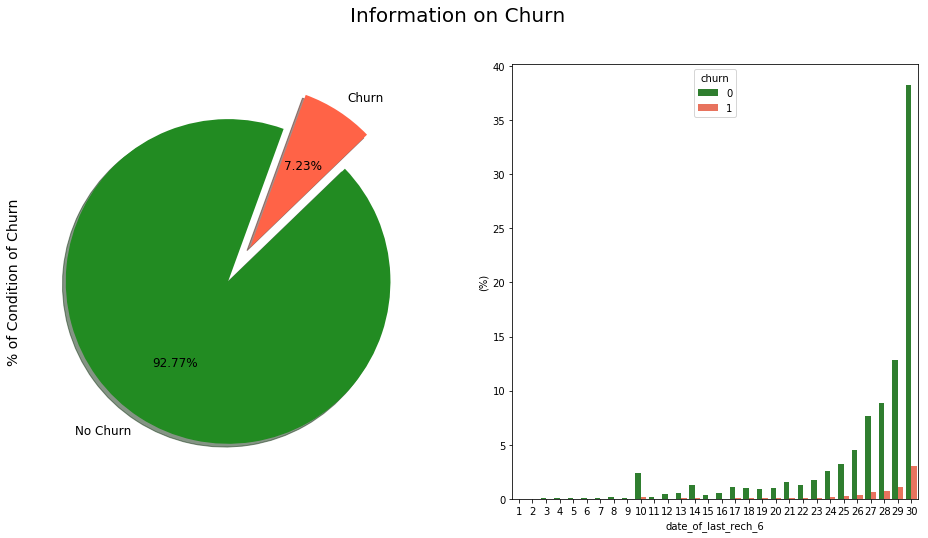

In [71]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
highv_users["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=highv_users, palette=palette, estimator=lambda x: len(x) / len(highv_users) * 100)
ax[1].set(ylabel="(%)")


**The above figure shows the ratio of "potential churn customers" to the "no-churn" customers.**

**Also, the days which has the major effect is towards the end of the month.**

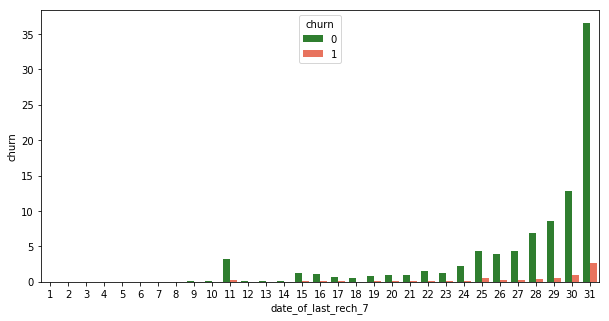

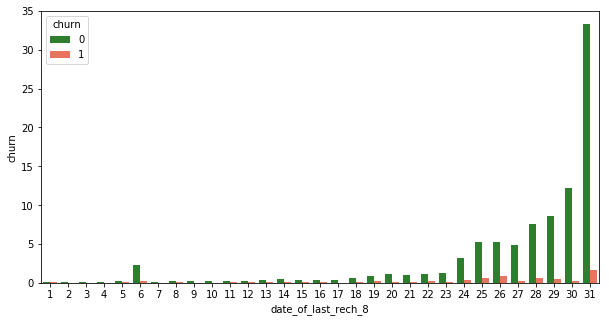

In [72]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=highv_users, palette=palette, 
            estimator=lambda x: len(x) / len(highv_users) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=highv_users, palette=palette, 
            estimator=lambda x: len(x) / len(highv_users) * 100)

**The above two graphs shows that maximum numer of recharges are done towards the last days of the month for 7th and 8th month.**

In [73]:
highv_users.shape

(29238, 149)

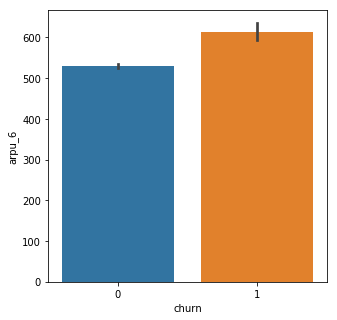

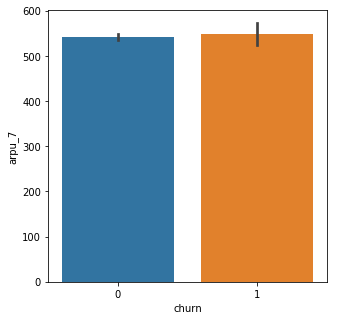

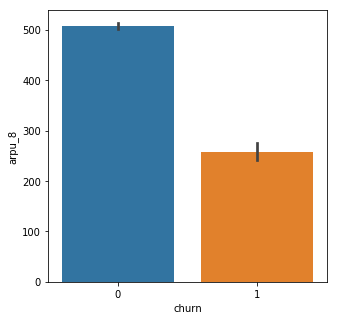

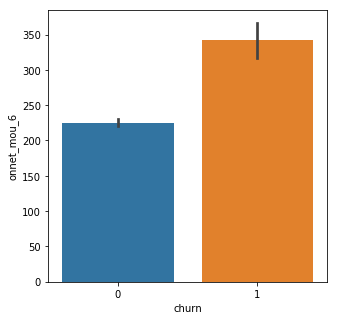

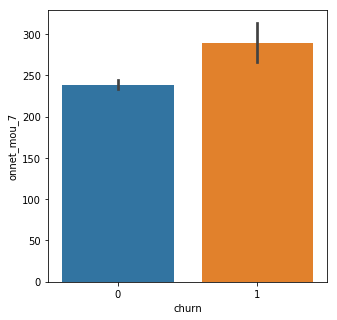

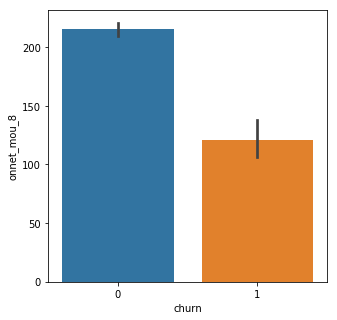

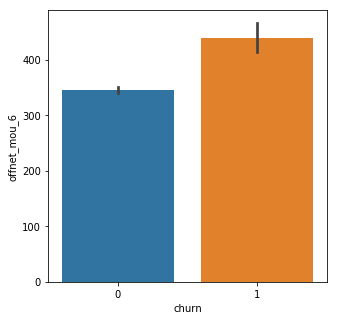

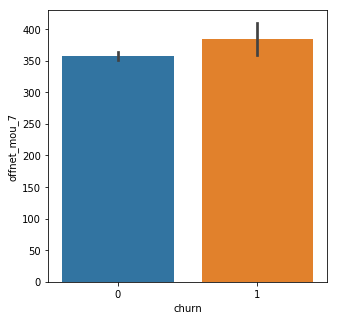

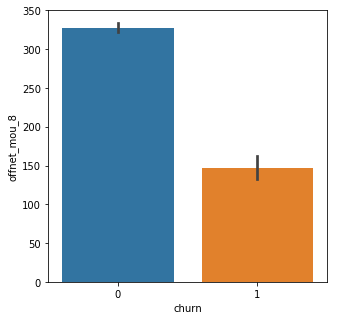

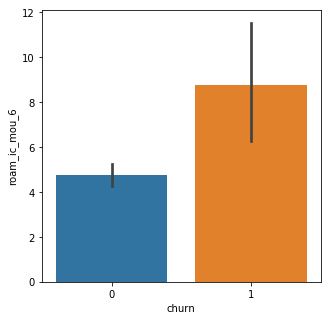

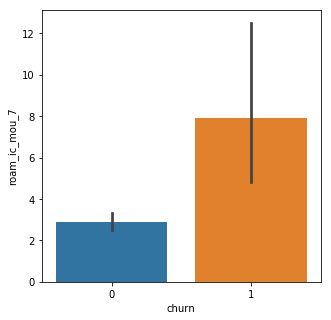

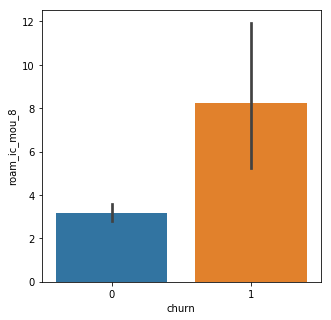

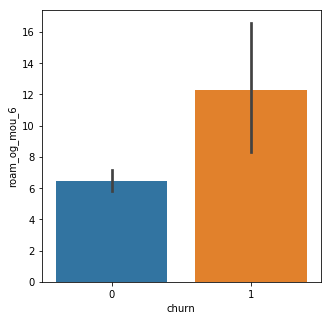

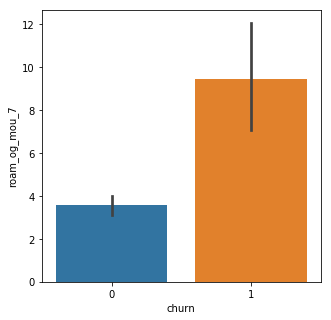

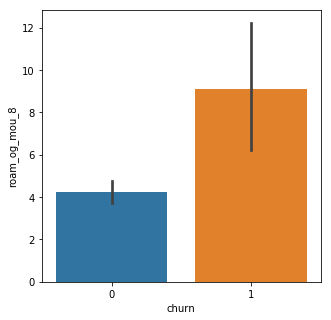

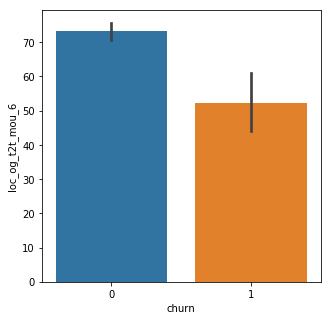

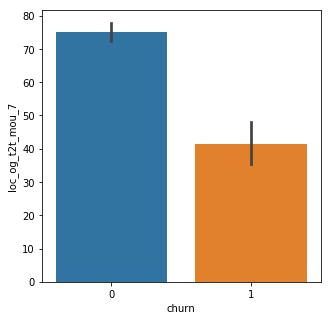

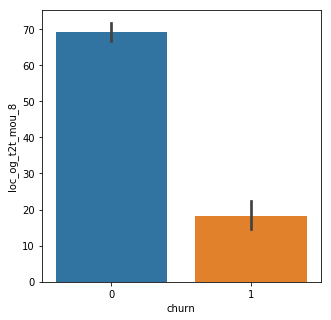

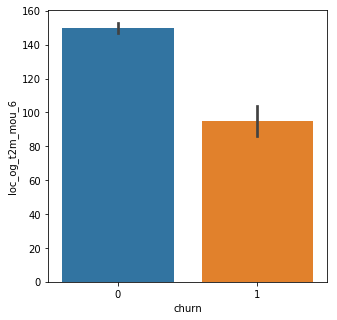

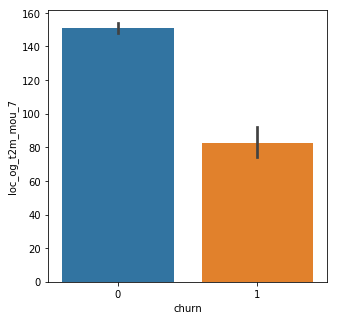

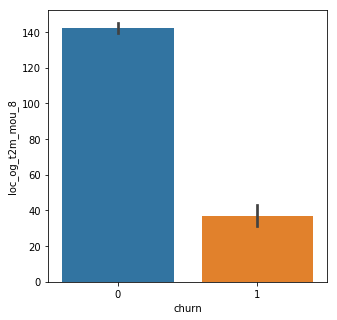

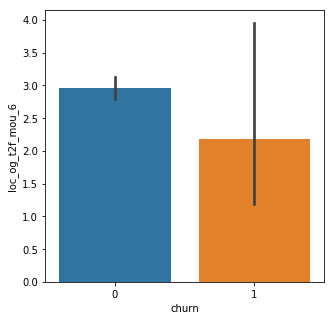

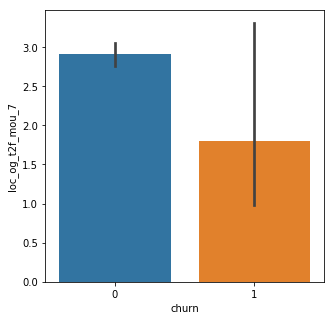

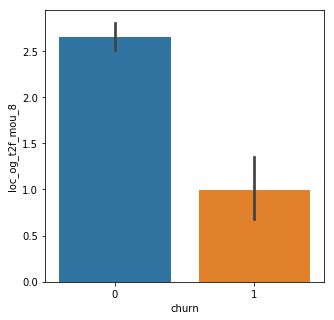

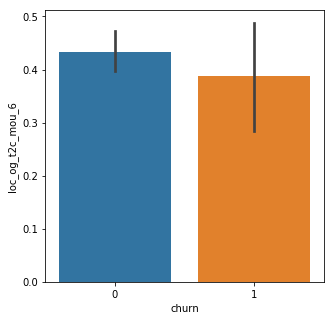

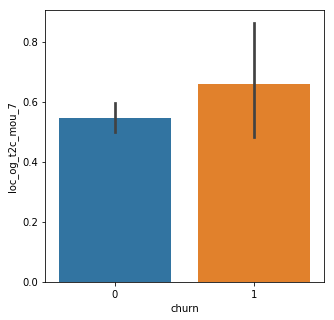

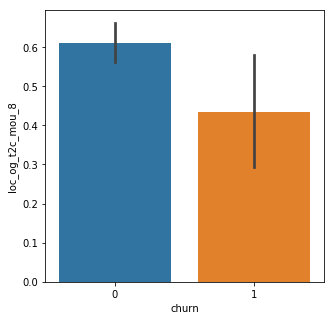

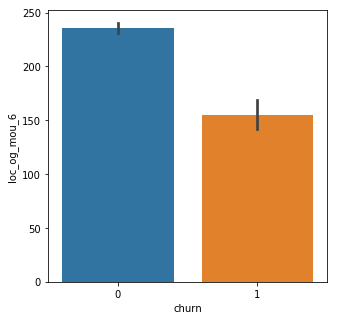

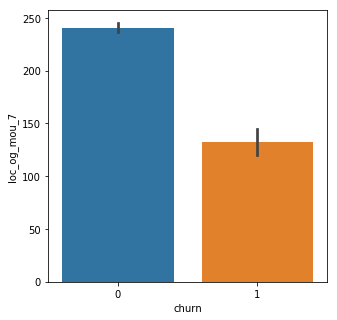

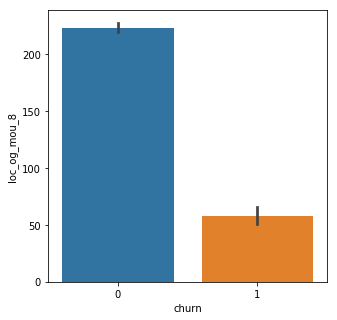

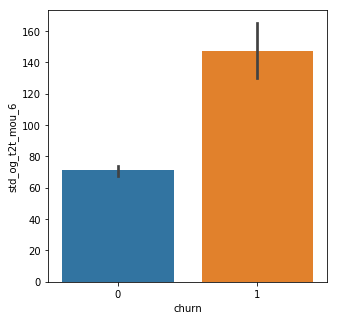

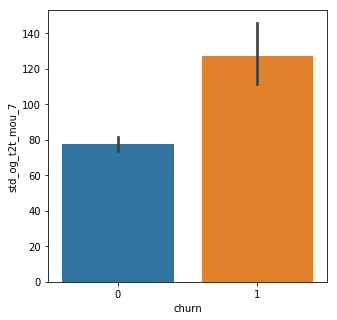

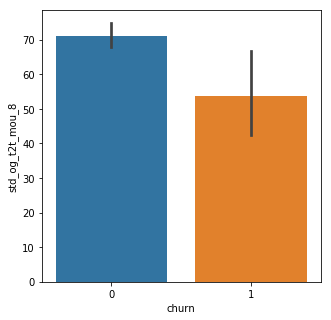

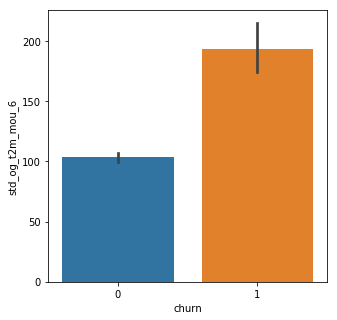

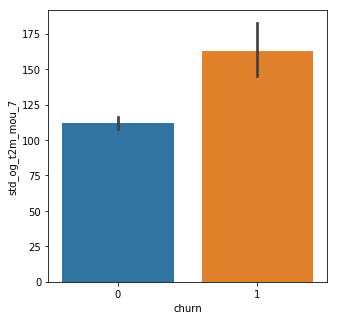

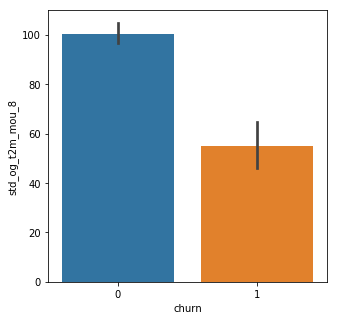

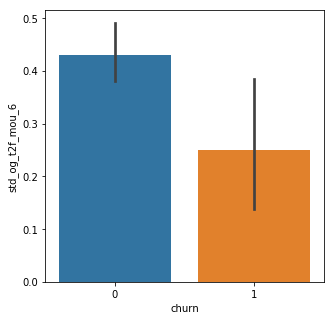

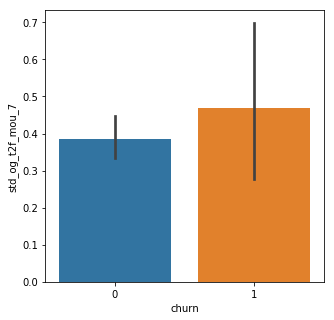

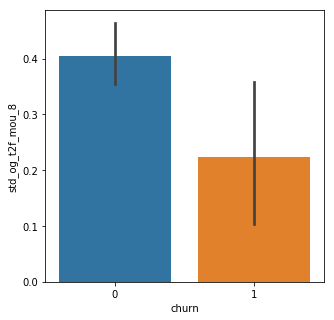

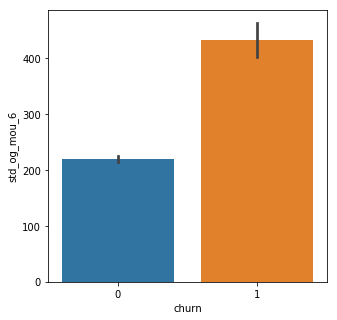

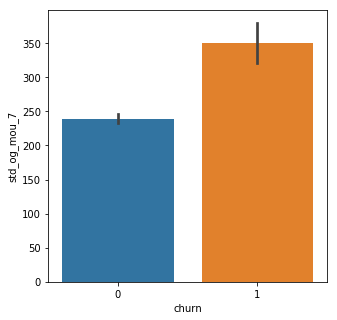

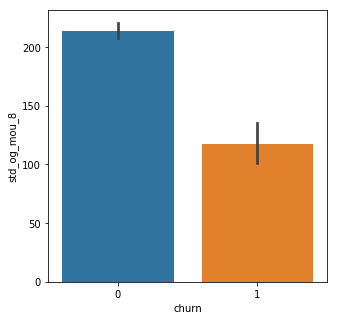

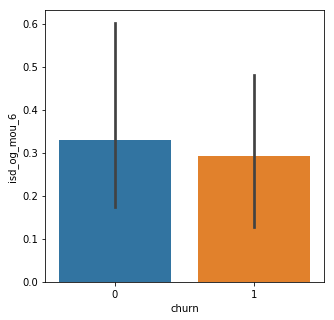

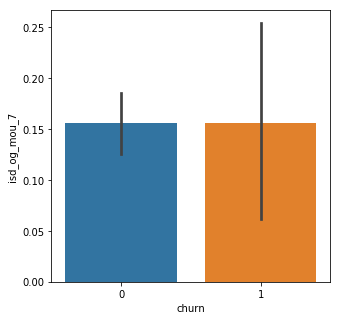

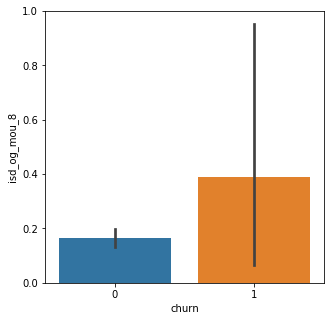

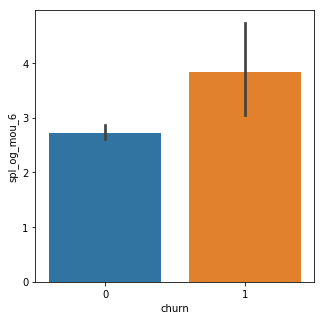

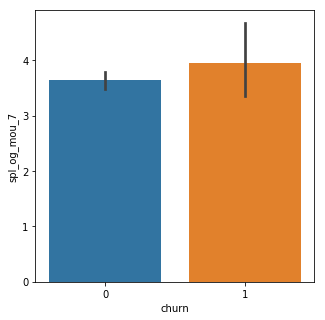

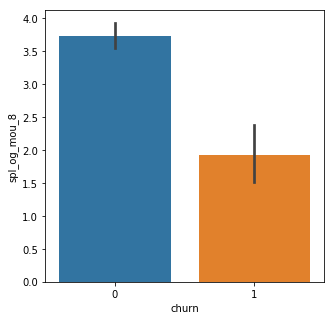

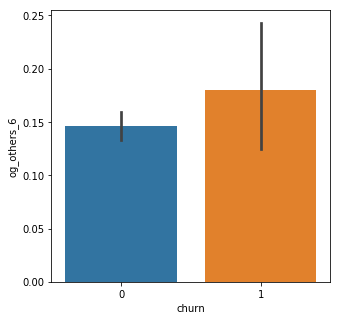

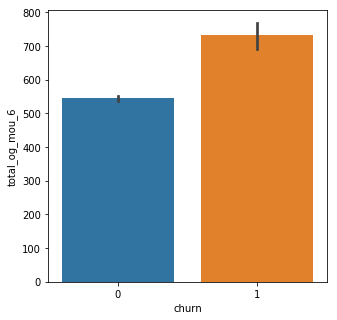

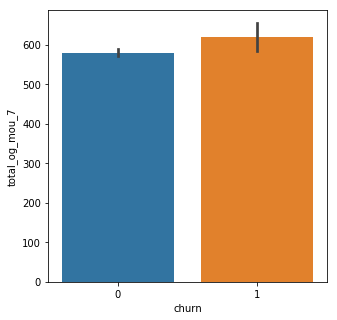

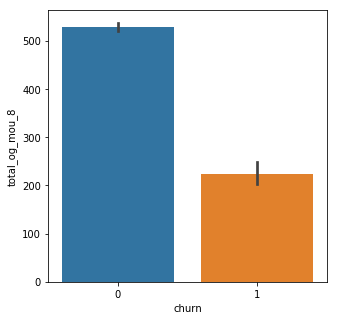

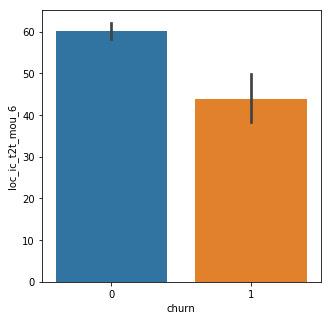

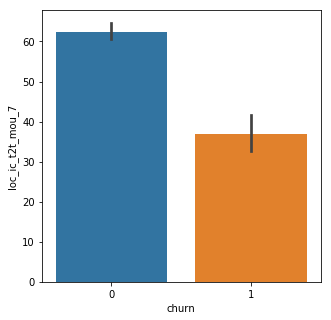

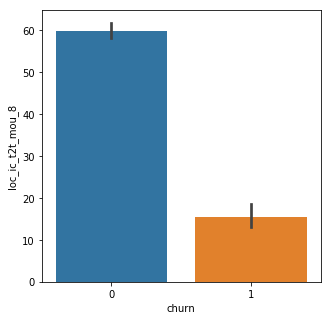

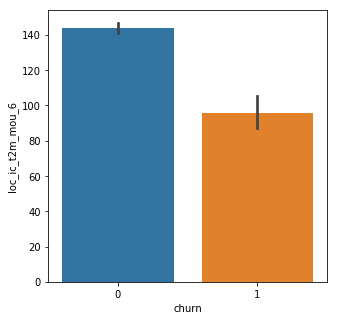

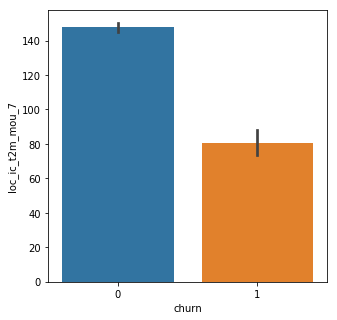

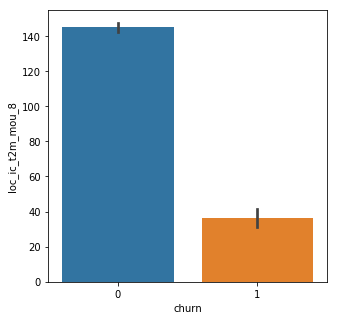

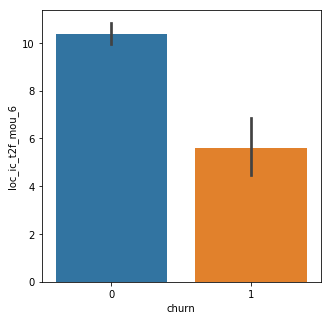

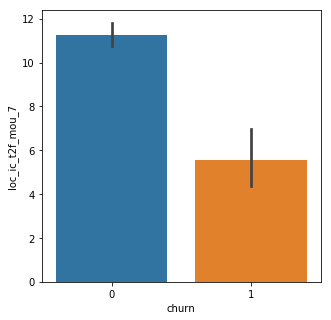

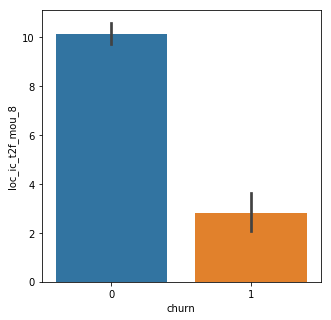

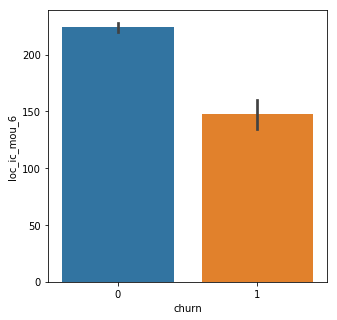

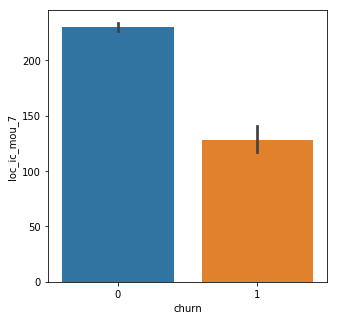

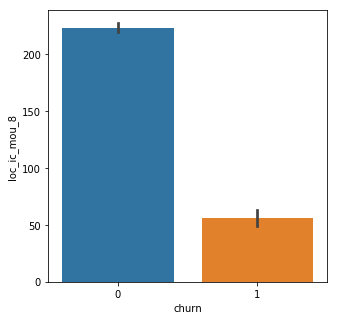

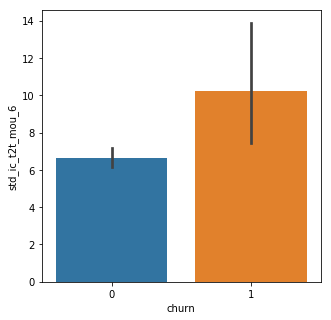

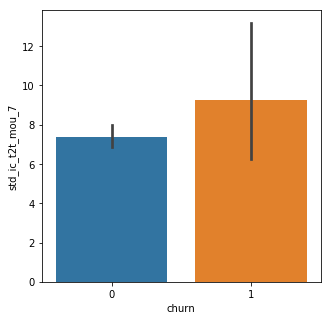

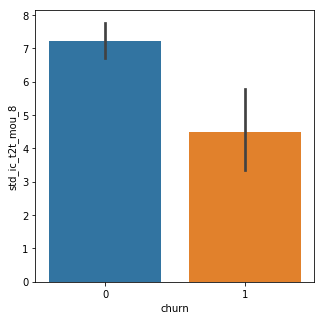

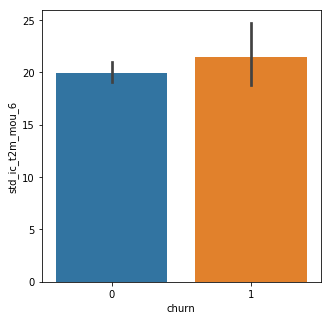

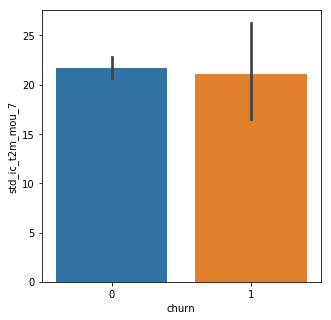

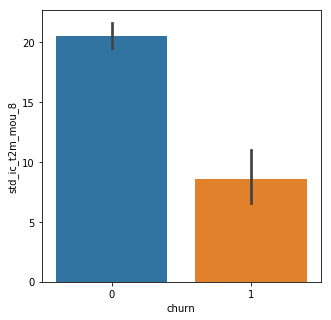

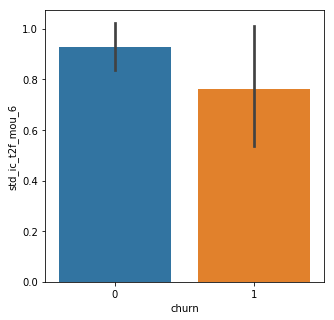

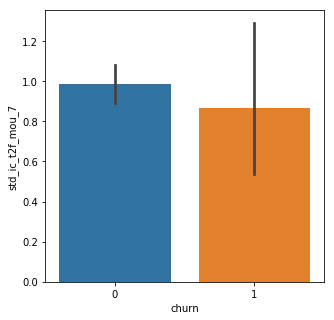

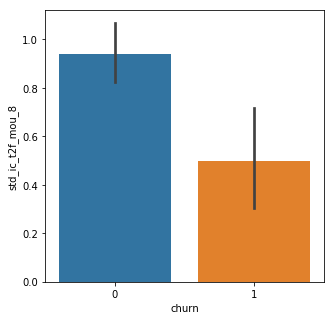

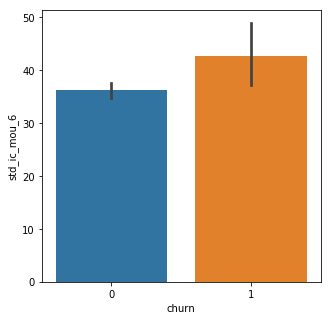

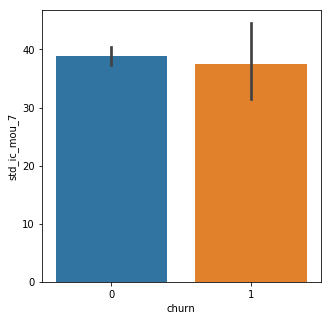

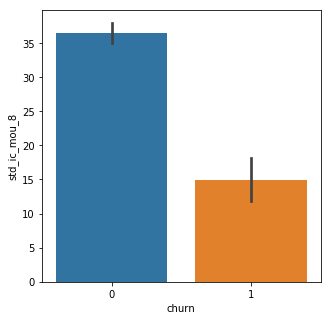

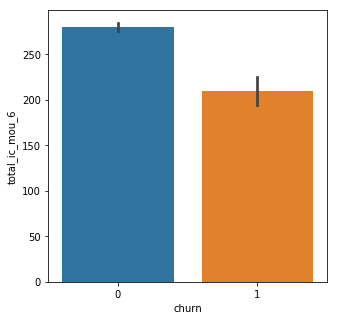

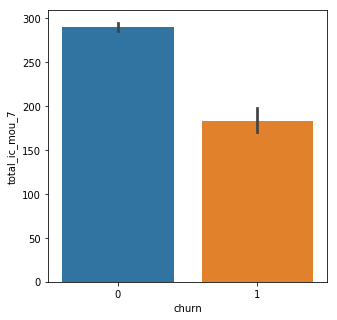

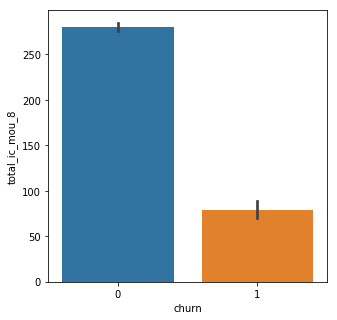

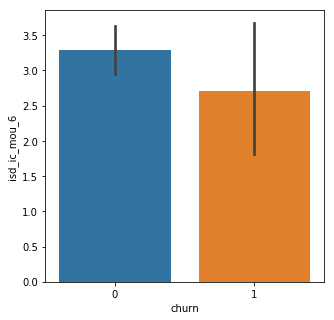

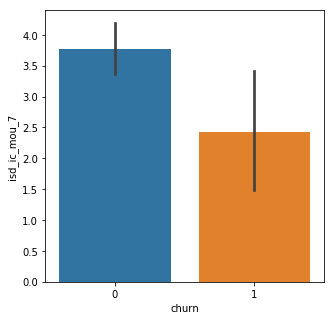

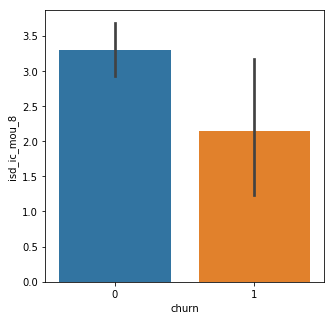

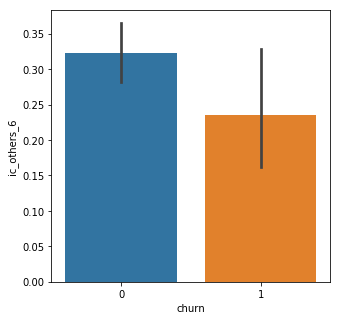

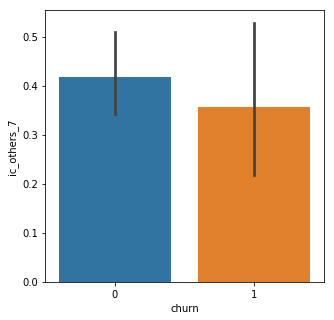

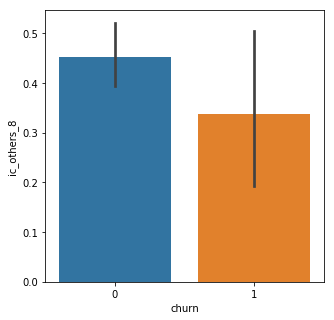

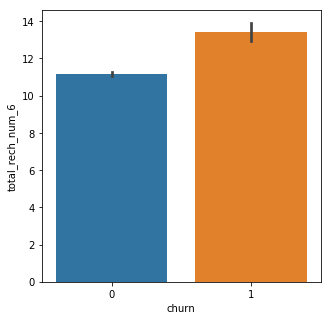

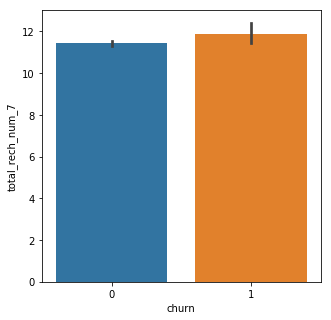

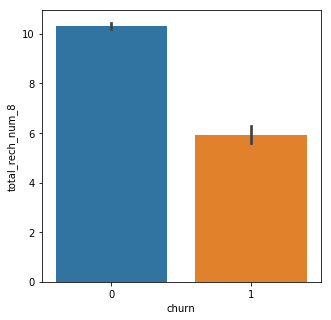

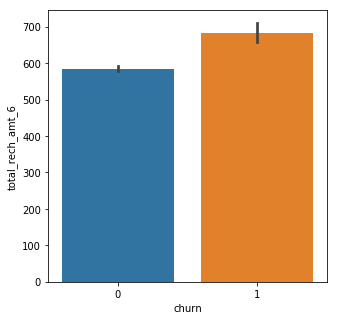

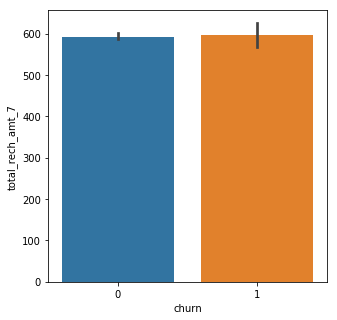

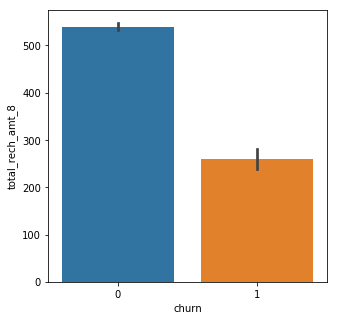

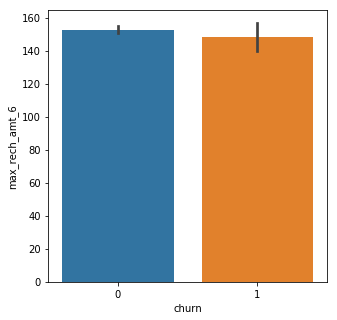

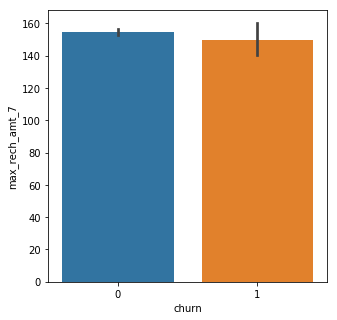

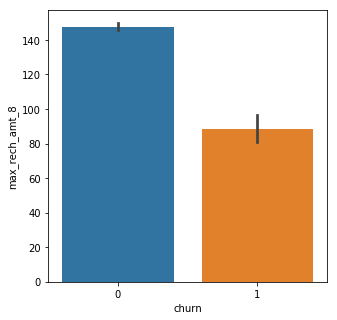

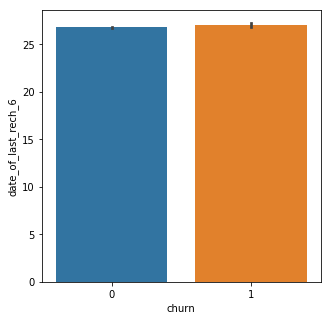

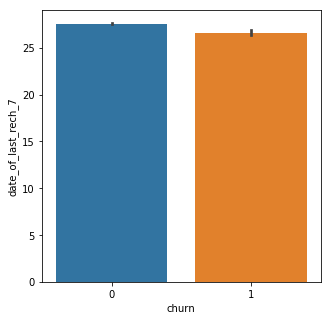

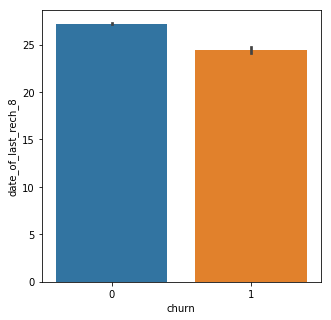

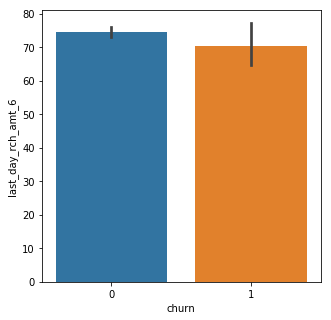

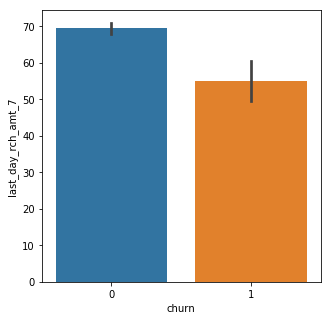

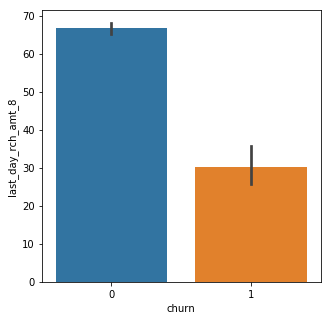

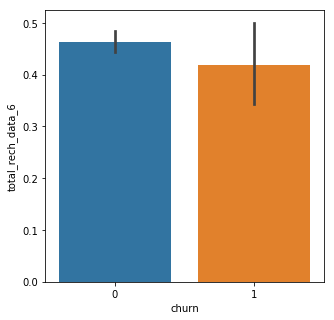

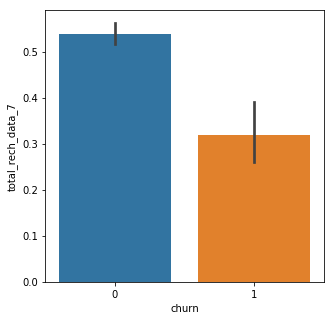

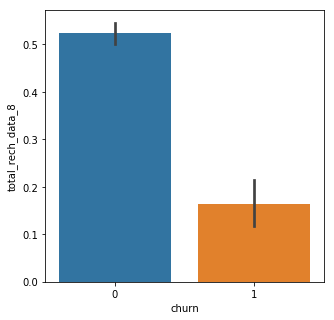

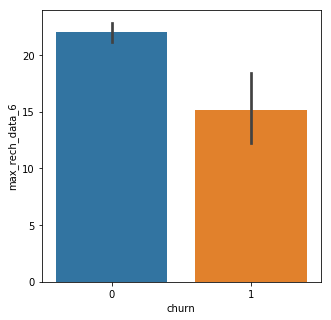

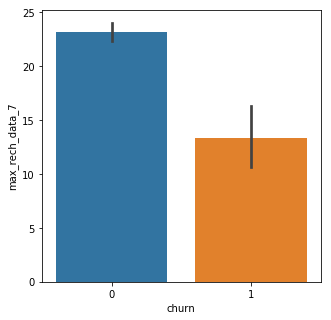

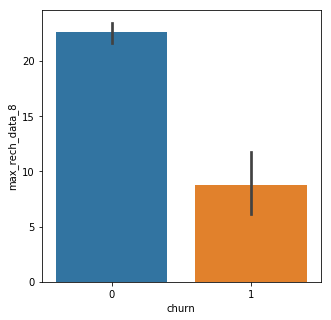

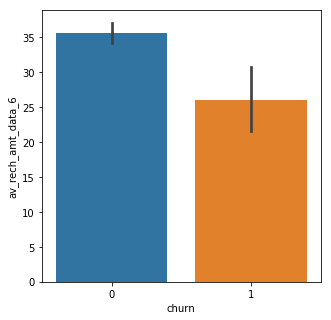

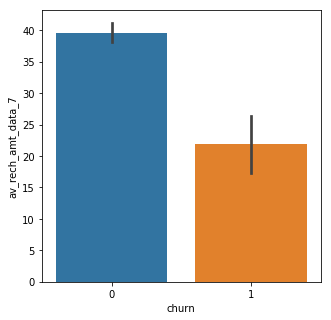

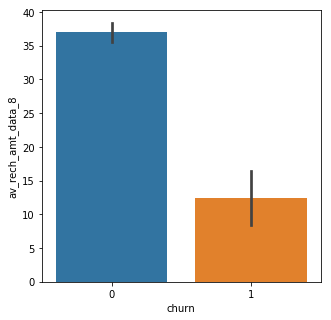

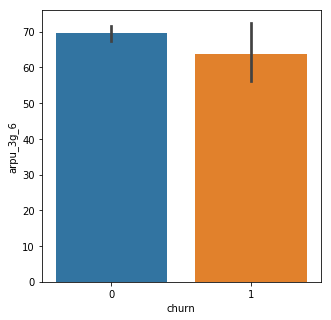

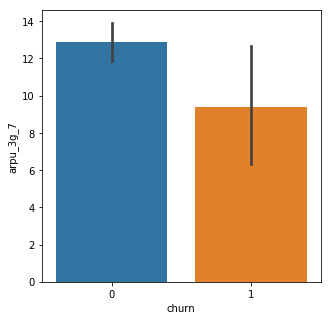

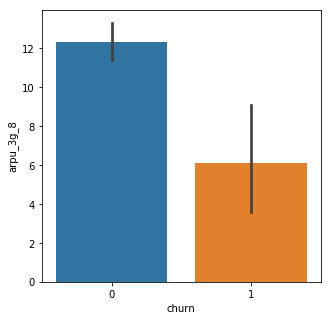

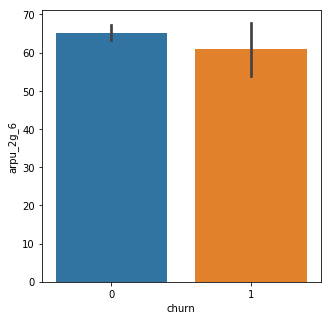

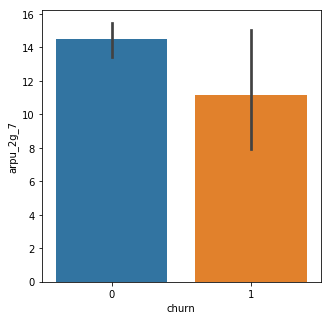

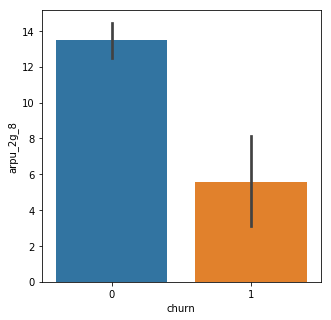

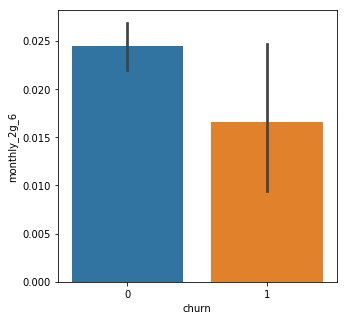

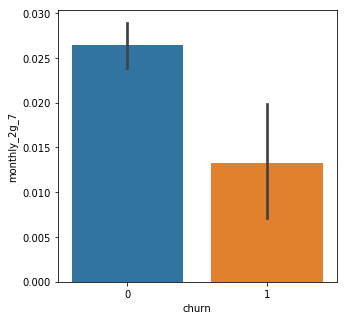

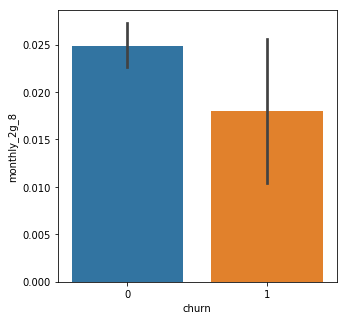

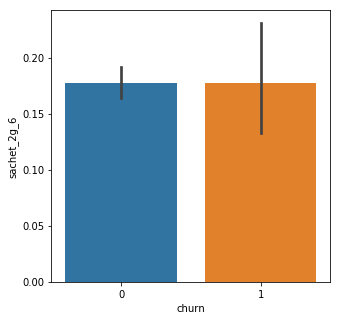

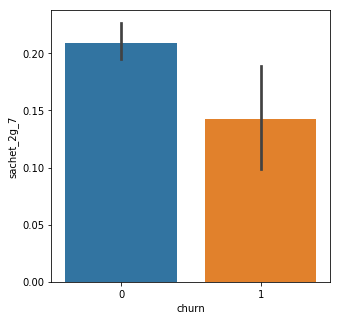

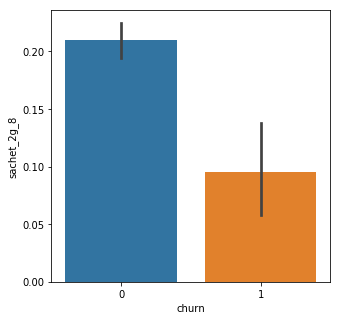

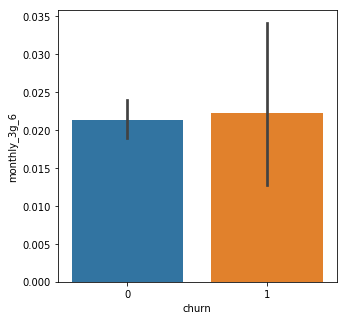

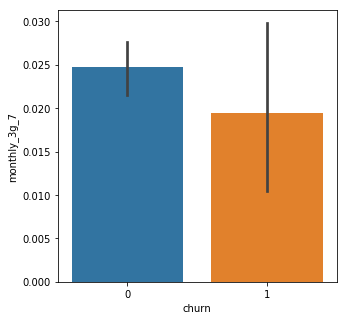

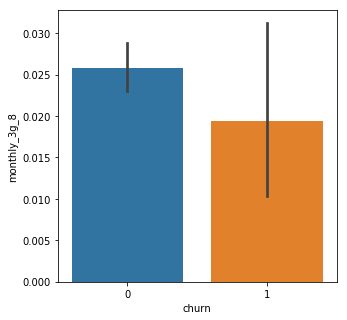

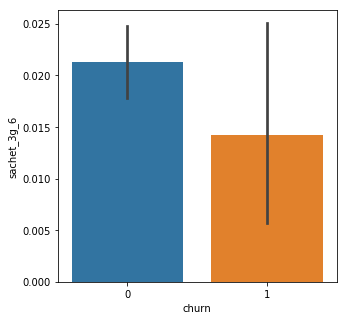

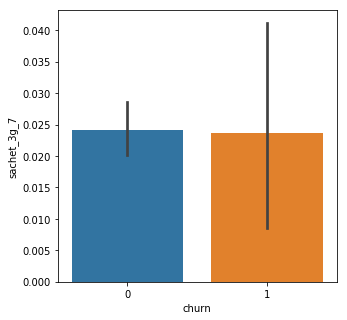

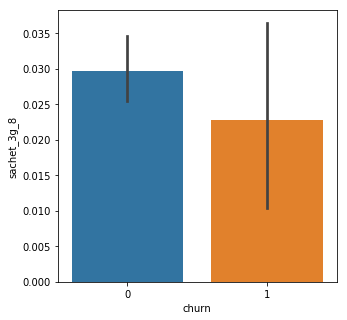

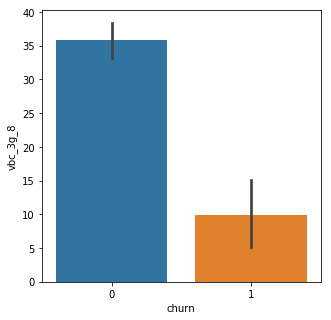

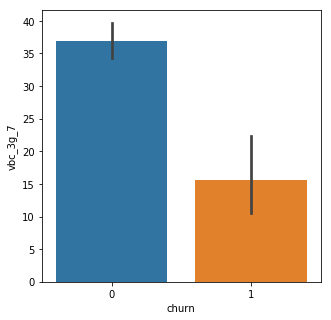

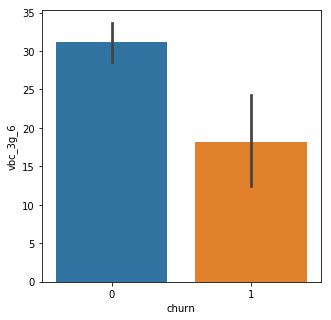

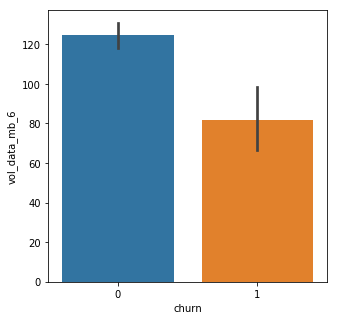

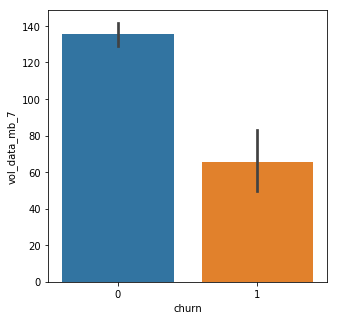

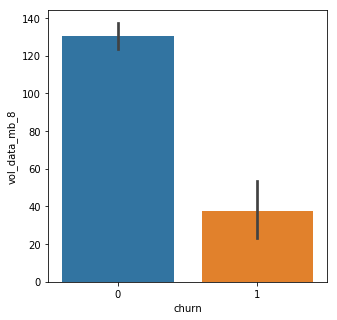

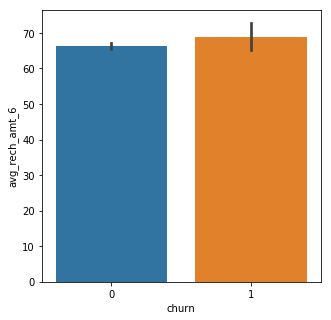

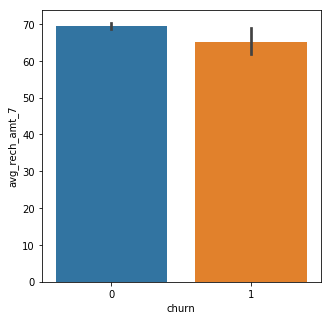

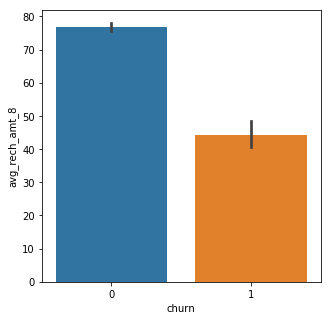

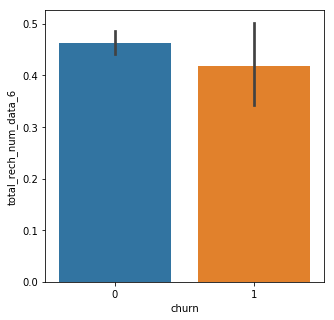

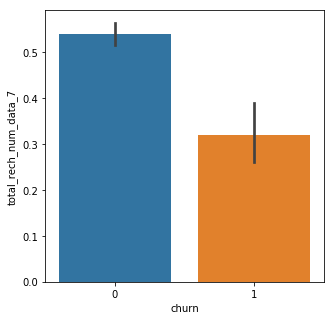

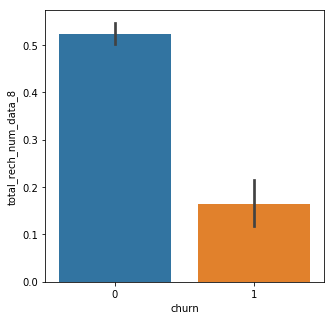

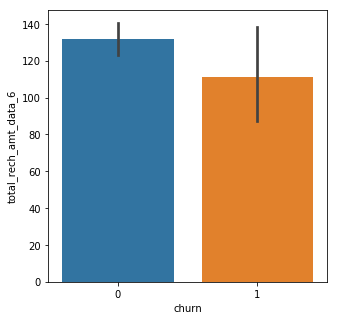

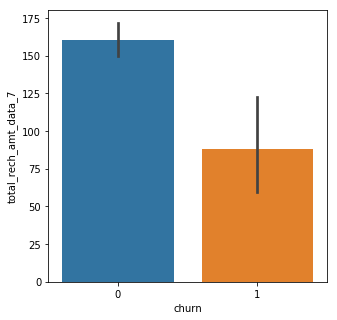

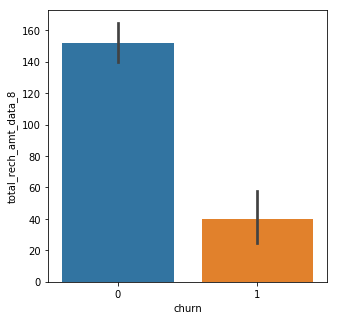

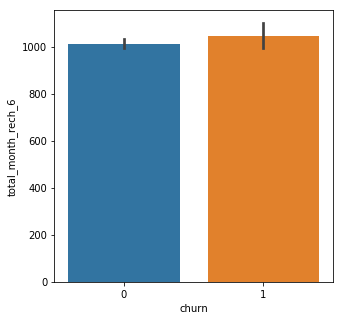

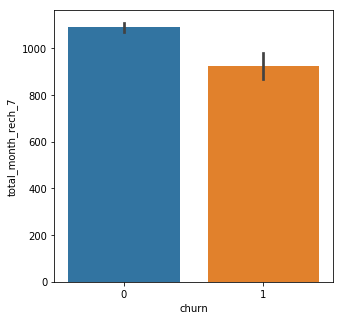

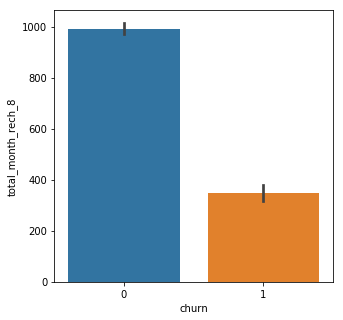

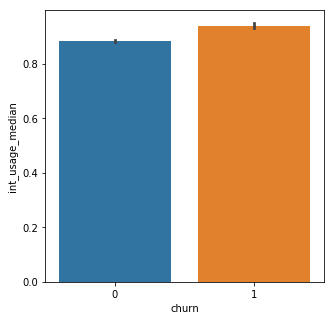

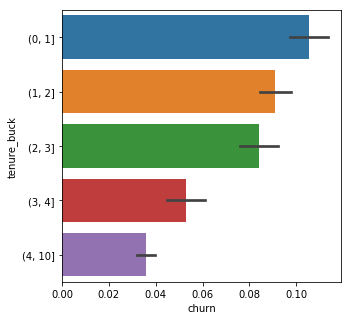

In [74]:
cont_cols = [col for col in highv_users.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=highv_users)
    plt.show()

**The above graph shows the statistical relation of "churn" with all other predictor variables**

In [75]:
highv_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 149 entries, mobile_number to tenure_buck
dtypes: category(1), float64(117), int32(3), int64(28)
memory usage: 34.2 MB


In [76]:
#Let's create dummy variable for "tenure_buck"

highv_users = pd.get_dummies(highv_users, drop_first=True)
highv_users.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                  "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

## Model Building

- Splitting data into test-train
- Scaling values
- Building model

In [77]:
# creating copy of the final highv_user dataframe
df = highv_users.copy()
# removing the columns not required for modeling
df.drop(['mobile_number'], axis=1, inplace=True)

In [78]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df.drop(['churn'], axis=1)

#putting response variables in Y
y = df['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [79]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20466, 150)
Number transactions y_train dataset:  (20466,)
Number transactions X_test dataset:  (8772, 150)
Number transactions y_test dataset:  (8772,)


In [80]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Let's handle class imbalance.

In [82]:
print("Before handling the imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Before handling the imbalance, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before handling the imbalance, counts of label '1': 1483
Before handling the imbalance, counts of label '0': 18983 

Before handling the imbalance, churn event rate : 7.25% 



#### As we can see in the above,a huge amount of data imbalance is present which needs to be treated before procedding with PCA for better model

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [84]:
print('After handling the imbalance, the shape of train_X: {}'.format(X_train_res.shape))
print('After handling the imbalance, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After handling the imbalance, counts of label '1': {}".format(sum(y_train_res==1)))
print("After handling the imbalance, counts of label '0': {}".format(sum(y_train_res==0)))
print("After handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After handling the imbalance, the shape of train_X: (37966, 150)
After handling the imbalance, the shape of train_y: (37966,) 

After handling the imbalance, counts of label '1': 18983
After handling the imbalance, counts of label '0': 18983
After handling the imbalance, churn event rate : 50.0% 



In [85]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [86]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [87]:
pca.explained_variance_ratio_[:50]

array([0.08319049, 0.07019978, 0.05433229, 0.03788041, 0.03017319,
       0.02908037, 0.02836475, 0.0257906 , 0.0237895 , 0.02208642,
       0.01821931, 0.01711764, 0.01666617, 0.01631476, 0.01561406,
       0.01398219, 0.01308341, 0.0129965 , 0.01273361, 0.01193329,
       0.011909  , 0.01165551, 0.01112488, 0.0105575 , 0.01022341,
       0.01009373, 0.00924117, 0.00903069, 0.00893546, 0.00853855,
       0.00847675, 0.00819509, 0.00797707, 0.00792498, 0.00788789,
       0.0074404 , 0.00726431, 0.00716456, 0.0071326 , 0.00699606,
       0.00698789, 0.00695251, 0.00683264, 0.0067736 , 0.00650669,
       0.00650108, 0.00643482, 0.00609557, 0.00601465, 0.00579154])

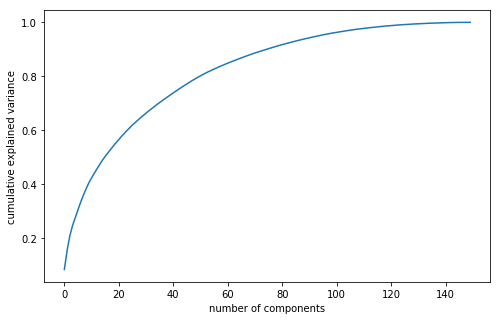

In [88]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**As we can see, 90% of the variance can be described by 80 components**

In [89]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [90]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(37966, 80)

In [91]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.030100989713794095 , min corr:  -0.01588513715807263


**OBSERVATION:**  As we can see the correlation between any of the two components is close to 0. We have successfully  removed multicollinearity from our data, and our models will be much more stable

In [92]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8772, 80)

### For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are,
    1. Logistic Regression with PCA
    2. Random Forest with PCA 

# 1. Logistic Regression

Let's apply Logistic Regression on our PCA components

In [93]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train_res)

In [94]:
#Making predictions on test data


pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.81'

In [95]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(X_test_pca)
y_pred_default = model_pca.predict(X_test_pca)

In [96]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [97]:
# print(classification_report(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6078 2064]
 [ 162  468]]
0.7462380300957593


In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.805030743976949


## Let's plot ROC curve

In [100]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

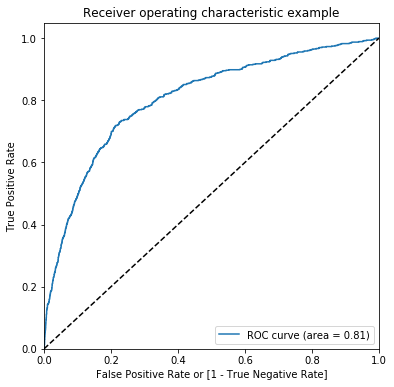

(array([0.00000000e+00, 1.22819946e-04, 1.22819946e-04, ...,
        9.99754360e-01, 9.99877180e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0015873, ..., 1.       , 1.       ,
        1.       ]),
 array([1.99896412e+00, 9.98964121e-01, 9.97878597e-01, ...,
        1.48300958e-09, 1.71668321e-12, 4.41712552e-29]))

In [101]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.574016,1,1,1,1,1,1,0,0,0,0
1,0,0.061881,1,0,0,0,0,0,0,0,0,0
2,0,0.617265,1,1,1,1,1,1,1,0,0,0
3,0,0.093746,1,0,0,0,0,0,0,0,0,0
4,0,0.027458,1,0,0,0,0,0,0,0,0,0


***Let's calculate accuracy sensitivity and specificity for various probability cutoffs.***

In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.071819  0.000000  1.000000
0.1   0.1  0.342681  0.296979  0.933333
0.2   0.2  0.476744  0.444117  0.898413
0.3   0.3  0.580255  0.558708  0.858730
0.4   0.4  0.669631  0.658929  0.807937
0.5   0.5  0.746238  0.746500  0.742857
0.6   0.6  0.816005  0.829157  0.646032
0.7   0.7  0.869357  0.897937  0.500000
0.8   0.8  0.904697  0.949275  0.328571
0.9   0.9  0.926357  0.986613  0.147619


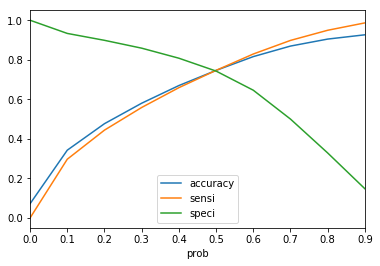

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [105]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.49869303026827966]


In [106]:
# Let's create new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8142
1     630
Name: churn, dtype: int64

### Confusion Matrix

In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6007, 2135],
       [ 157,  473]], dtype=int64)

### Metrics of the Logistic Regression Model on PCA

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7462380300957593
Sensitivity:  0.7507936507936508
Specificity:  0.7377794153770573
false postive rate:  0.2622205846229428
positive predictive value:  0.18136503067484663
Negative predictive value:  0.9745295262816352
Misclassification Rate:  0.2612859097127223


# 2. RandomForest with PCA

In [116]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_pca,y_train_res)

# Making predictions
y_pred_default = rfc.predict(X_test_pca)

In [117]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7706,  436],
       [ 437,  193]], dtype=int64)

In [118]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.30634920634920637
Specificity:  0.9464505035617784
false postive rate:  0.053549496438221565
positive predictive value:  0.3068362480127186
Negative predictive value:  0.9463342748372836
Misclassification Rate:  0.09952120383036936


### Hyperparameter tuning for RandomForest

In [128]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 21, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier()


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True )
rf_with_pca.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [129]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.881117,0.246577,0.168711,0.006249,1,{'max_depth': 1},0.706822,0.720201,0.751799,0.723246,...,0.729045,0.016264,4,0.723596,0.734847,0.743512,0.722775,0.739317,0.732809,0.008326
1,34.708726,0.250182,0.221824,0.006247,6,{'max_depth': 6},0.791501,0.800790,0.812685,0.807122,...,0.805411,0.008507,3,0.822341,0.821188,0.824356,0.819112,0.819619,0.821323,0.001900
2,53.534680,1.057813,0.296806,0.024201,11,{'max_depth': 11},0.908375,0.905395,0.902538,0.904654,...,0.906770,0.003586,2,0.950604,0.946568,0.950146,0.948963,0.949755,0.949207,0.001425
3,56.115447,4.046412,0.296815,0.024193,16,{'max_depth': 16},0.942599,0.943725,0.937788,0.939375,...,0.941427,0.002410,1,0.986296,0.987739,0.987548,0.987162,0.986200,0.986989,0.000634


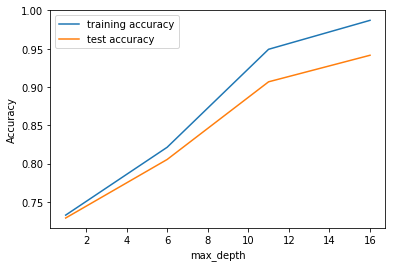

In [130]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [132]:
# Tuning n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 250, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=11)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True )
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=11,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.540807,0.406084,0.193704,0.028974,50,{'n_estimators': 50},0.899526,0.900040,0.897406,0.899776,...,0.900016,0.001903,4,0.946003,0.945873,0.944786,0.946762,0.945643,0.945813,0.000636
1,54.970802,0.260483,0.328049,0.031241,100,{'n_estimators': 100},0.903476,0.899776,0.896879,0.902015,...,0.902729,0.004917,3,0.947419,0.946268,0.947124,0.949001,0.948737,0.947710,0.001023
2,80.968711,0.946386,0.454541,0.003043,150,{'n_estimators': 150},0.905715,0.901883,0.897274,0.899776,...,0.903229,0.004975,2,0.947945,0.946729,0.946334,0.947980,0.949462,0.947690,0.001100
3,89.337840,6.880234,0.469446,0.025761,200,{'n_estimators': 200},0.904267,0.906888,0.897932,0.901488,...,0.904388,0.004583,1,0.948604,0.946861,0.947190,0.948441,0.948507,0.947921,0.000740


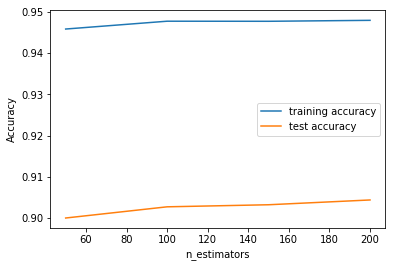

In [134]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,  scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.256055,0.988504,0.318674,0.012497,4,{'max_features': 4},0.874901,0.876333,0.873699,0.883577,...,0.879181,0.005353,4,0.918741,0.918809,0.919633,0.918414,0.917690,0.918657,0.000629
1,56.258400,1.806612,0.334297,0.030612,8,{'max_features': 8},0.886094,0.885948,0.882918,0.881733,...,0.886319,0.004615,3,0.930298,0.927172,0.927073,0.926942,0.927699,0.927837,0.001257
2,94.803588,1.497023,0.303052,0.037748,14,{'max_features': 14},0.890176,0.886738,0.885948,0.889108,...,0.889796,0.003920,2,0.934973,0.932638,0.933428,0.933889,0.932868,0.933559,0.000831
3,112.829227,8.987598,0.259321,0.023372,20,{'max_features': 20},0.891888,0.888713,0.888186,0.888450,...,0.891376,0.004346,1,0.936389,0.934119,0.933658,0.935699,0.935930,0.935159,0.001071


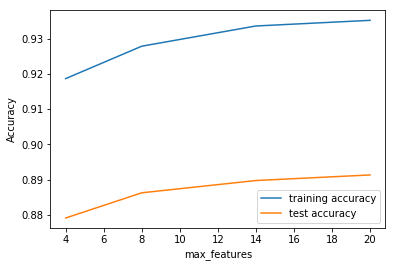

In [137]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [138]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 250, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [139]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,48.927346,0.469306,0.284309,0.006248,100,{'min_samples_leaf': 100},0.808401,0.811537,0.822995,0.816146,...,0.818417,0.008793,1,0.842980,0.837356,0.838771,0.839825,0.837026,0.839192,0.002144
1,43.321891,1.889977,0.274936,0.021191,150,{'min_samples_leaf': 150},0.793785,0.803240,0.812327,0.806006,...,0.806775,0.008373,2,0.820657,0.824614,0.822342,0.820498,0.819149,0.821452,0.001878
2,38.274853,0.424327,0.212453,0.015932,200,{'min_samples_leaf': 200},0.785752,0.797445,0.803635,0.799552,...,0.798873,0.007487,3,0.811306,0.814868,0.813650,0.812860,0.806539,0.811845,0.002894


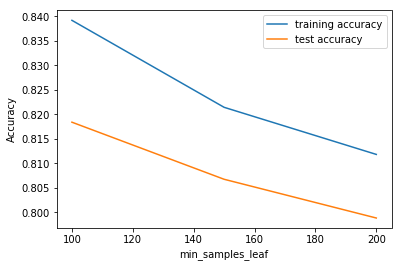

In [140]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [141]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(150, 350, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [142]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,69.036848,0.264259,0.340546,0.026877,150,{'min_samples_split': 150},0.841585,0.849072,0.858554,0.857895,...,0.855555,0.009799,1,0.897801,0.895302,0.896158,0.895894,0.894051,0.895841,0.001220
1,65.972305,1.484938,0.340546,0.028636,200,{'min_samples_split': 200},0.831446,0.841565,0.847096,0.842750,...,0.844071,0.008449,2,0.879297,0.874428,0.876634,0.874165,0.875152,0.875935,0.001887
2,61.832626,0.602716,0.321797,0.012496,250,{'min_samples_split': 250},0.821175,0.829843,0.835901,0.834848,...,0.833430,0.007926,3,0.864349,0.860995,0.860567,0.861456,0.859974,0.861468,0.001521
3,48.604789,5.336693,0.269087,0.041942,300,{'min_samples_split': 300},0.812747,0.822731,0.830765,0.825761,...,0.825318,0.007489,4,0.852463,0.851315,0.849867,0.849768,0.846673,0.850017,0.001946


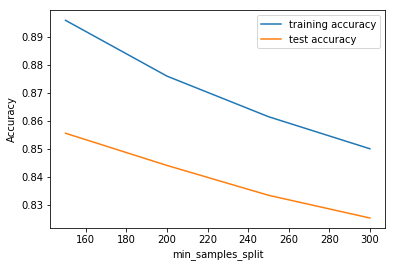

In [143]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [145]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 300, 100),
    'n_estimators': range(200, 300, 100), 
    'max_features': [8, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,cv = 5, n_jobs=-1, verbose = 1,return_train_score=True )
grid_search.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [146]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8186538021501514 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [147]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, max_depth=10,min_samples_leaf=100, min_samples_split=200, 
                             max_features=10, n_estimators=200)

In [148]:
# fit
rfc.fit(X_train_pca, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
# predict
y_pred_default = rfc.predict(X_test_pca)

In [150]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8142
           1       0.22      0.64      0.33       630

    accuracy                           0.81      8772
   macro avg       0.59      0.73      0.61      8772
weighted avg       0.91      0.81      0.85      8772

[[6711 1431]
 [ 226  404]]
accuracy_score:   0.8111035111719106


In [151]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6711, 1431],
       [ 226,  404]], dtype=int64)

### Statistical metrics for Random Forest

In [152]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8111035111719106
Sensitivity:  0.6412698412698413
Specificity:  0.8242446573323507
false postive rate:  0.17575534266764922
positive predictive value:  0.22016348773841962
Negative predictive value:  0.9674210753928211
Misclassification Rate:  0.18889648882808938


### Recomendation for Model Selection

**Logistic Regression  performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA. As the sensitivity of Logistic Regression is higher with better specificity score so we might not miss out on predicting the potential churn customers.**

- LogisticRegression is the best model with 75% Sensitivity
- Sensitivity of RandomForest is comparatively lower with 64%

#### LogisticRegression with PCA 
- Accuracy Score on test data:  0.7462380300957593
- Sensitivity:  0.7507936507936508
- Specificity:  0.7377794153770573
- false postive rate:  0.2622205846229428
- positive predictive value:  0.18136503067484663
- Negative predictive value:  0.9745295262816352
- Misclassification Rate:  0.2612859097127223

#### RandomForest with PCA
- Accuracy Score:   0.8111035111719106
- Sensitivity:  0.6412698412698413
- Specificity:  0.8242446573323507
- false postive rate:  0.17575534266764922
- positive predictive value:  0.22016348773841962
- Negative predictive value:  0.9674210753928211
- Misclassification Rate:  0.18889648882808938

### **Hence, Logistic Regression with PCA is the ideal Model in this scenario for predicting churn customers**

# Random Forest for churn driver features (using imbalance treated data)
 - To get the important predictors we will use the Random Forest model which we create above and fit it on the 
   dataset we get after handling the data imbalance

In [156]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

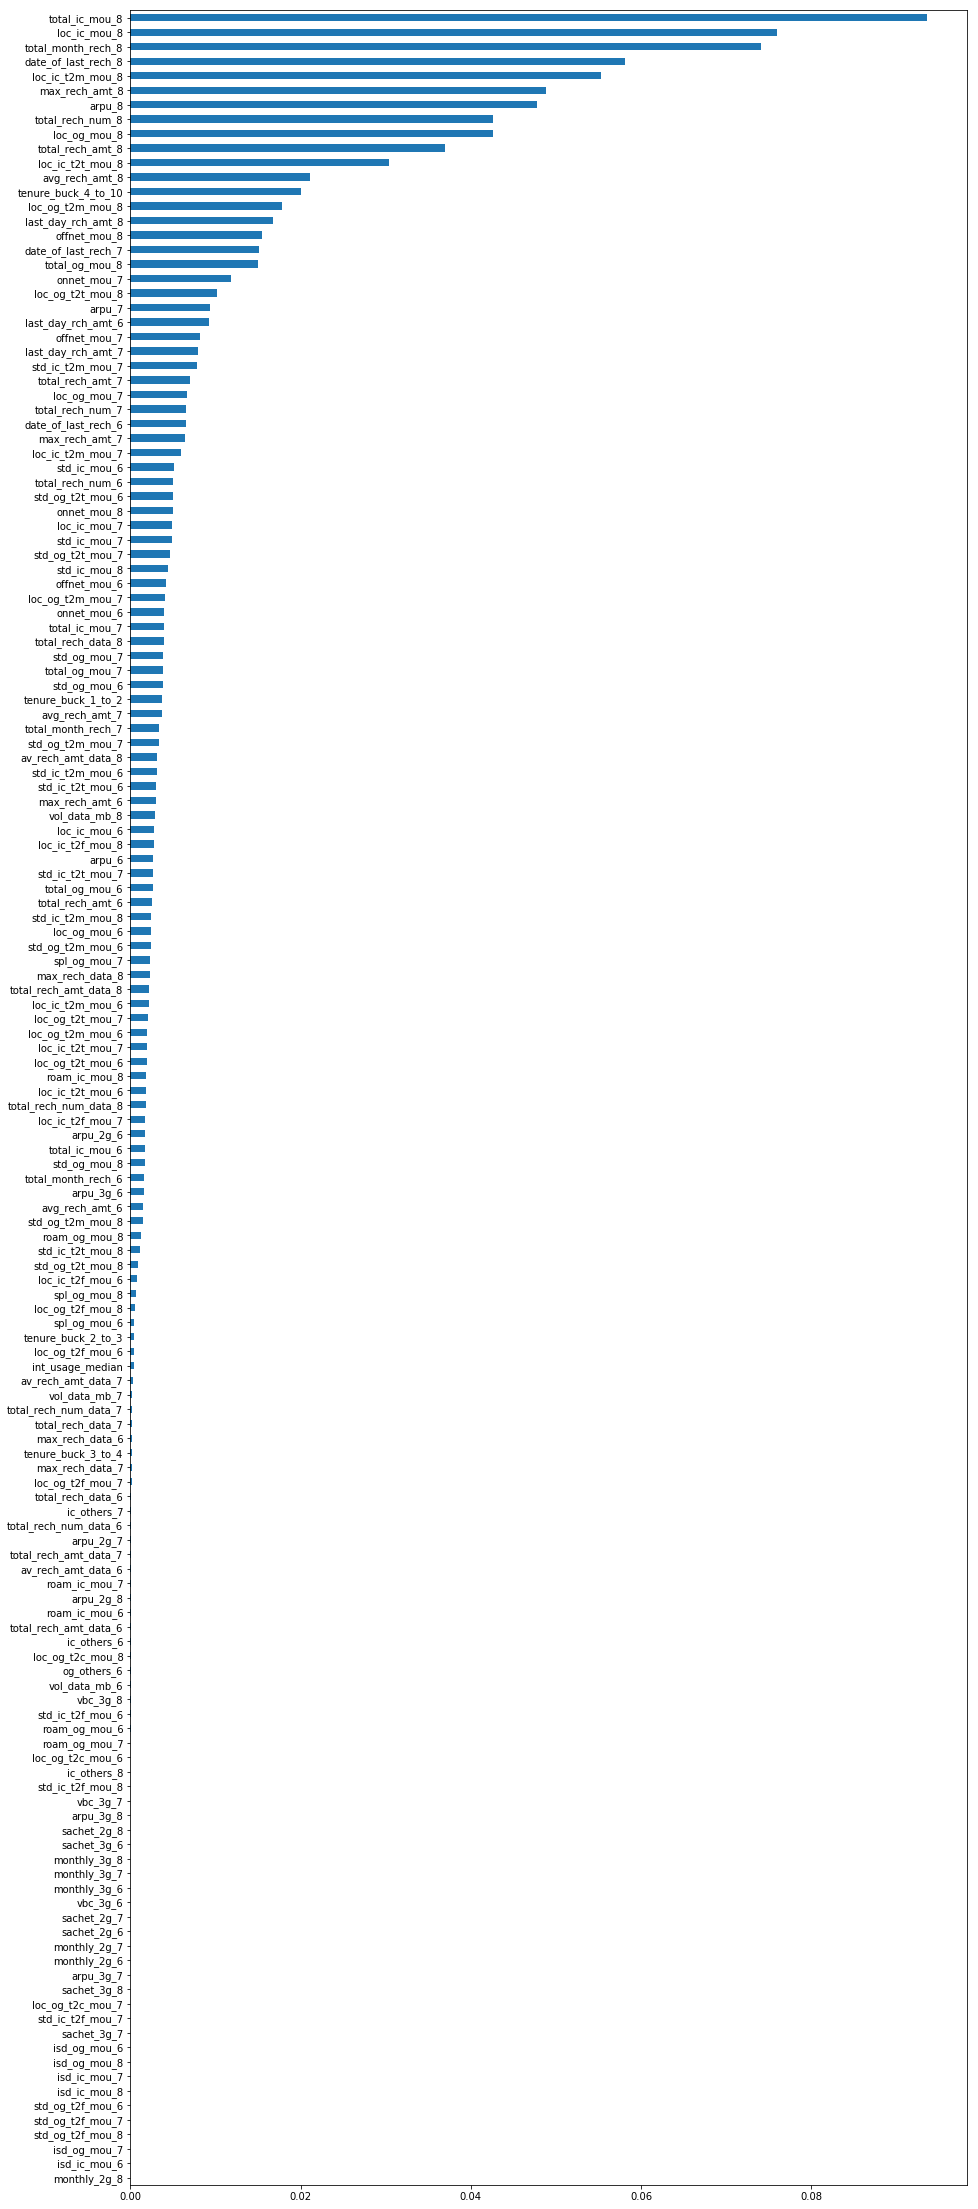

In [163]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

# Observation:

The above graph suggest that the top features are ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 primarily i.e., the action month. 

Hence, it is evident that the activity in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:




1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**date_of_last_rech_8**	-- *Last date of recharge in the month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
7.	**arpu_8**				-- *average revenue per user in month 8*
8.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
9.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
10.	**total_rech_amt_8**	-- *total recharge amount in month 8*
11.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
12.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
13.	**tenure_buck_4_to_10**		-- *tenure of the customer using the operator T network*
14.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
15.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
16.     **offnet_mou_8**        -- *All kind of voice calls(minutes of usage) outside the operator T network in month 8*
17.	**date_of_last_rech_7**	-- *Last date of recharge in the month 7*
18.	**total_og_mou_8**      -- *total number of outgoing calls in month 8*
19.     **onnet_mou_7**        -- *All kind of voice calls within the same operator network in month 7*
20.	**loc_oc_t2t_mou_8**	-- *local outgoing calls from same operator minutes of usage in month 8*

"Total Monthly calls & Local calls Mou" for incoming or outgoing is a very important factor for churn predictions. Reduction in these features forms a clear indicator of churn.

On the whole, drop in any of these features is a signal that the customer is not actively engaging in the services offered by the telecom operator and thus may choose to churn in the near future.

Let's look at some of the business steps which can be taken to retain these predicted churners.

## Business steps to manage the customer churn

As given,it is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

### Supervising any Drop in usage

Customer churn can be well predicted by drop in usage. 

Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. 

As billing cycles are typically monthly, a drop in usage numbers will give the company time to take proactive steps when tracked at weekly level. 

Company should contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported. 

Also, marketing team should take initiatives to come up with campaigns which targets these high-value to-be churner using help of Machine Learning to provide the best offers.